In [913]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pylab import rcParams
import statsmodels.api as sm
import torch
import torch.nn as nn
import time
import math
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

# Importing the data from the current directory and determining the structure and formatting (rows, columns, datatype, etc) of it.

In [914]:
activision = pd.read_csv('Activision Blizzard.csv', index_col='Date', parse_dates=['Date'])
activision.head()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2000-01-03  1.312500  1.375000  1.166667  1.369792   1.214421   7226400
2000-01-04  1.343750  1.354167  1.187500  1.328125   1.177480   4262400
2000-01-05  1.317708  1.364583  1.312500  1.333333   1.182098   3390000
2000-01-06  1.322917  1.333333  1.296875  1.307292   1.159010   2430000
2000-01-07  1.322917  1.354167  1.291667  1.343750   1.191333  15549600

In [915]:
ubisoft = pd.read_csv('Ubisoft.csv', index_col='Date', parse_dates=['Date'])
ubisoft.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2000-01-04  53.750000  53.750000  48.000000  49.250000  49.250000  35332.0
2000-01-05  48.750000  48.750000  45.299999  46.825001  46.825001  22688.0
2000-01-06  46.325001  47.875000  46.325001  47.875000  47.875000  13656.0
2000-01-07  48.750000  49.200001  47.150002  47.150002  47.150002  18296.0
2000-01-10  50.000000  50.875000  48.000000  50.849998  50.849998  21072.0

In [916]:
nintendo = pd.read_csv('Nintendo.csv', index_col='Date', parse_dates=['Date'])
nintendo.head()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2000-01-03  4.200  4.275  4.050  4.200   3.990652  134500
2000-01-04  3.950  4.025  3.800  3.950   3.753113  171000
2000-01-05  3.875  3.900  3.700  3.875   3.681852  301500
2000-01-06  3.800  3.975  3.725  3.800   3.610590  158500
2000-01-07  3.850  3.900  3.700  3.850   3.658098  156000

In [917]:
activision.describe()

Open         High          Low        Close    Adj Close  \
count  5868.000000  5868.000000  5868.000000  5868.000000  5868.000000   
mean     27.200409    27.521296    26.843414    27.190898    26.284963   
std      27.803254    28.072993    27.486007    27.782387    27.696254   
min       0.471354     0.502604     0.447917     0.471354     0.417890   
25%       6.545000     6.639610     6.443750     6.538750     5.797083   
50%      12.350000    12.505000    12.160000    12.330000    11.179425   
75%      46.275000    47.232501    45.632500    46.480000    45.406249   
max     103.820000   104.529999   102.550003   103.809998   102.699333   

             Volume  
count  5.868000e+03  
mean   9.430837e+06  
std    8.047555e+06  
min    3.348000e+05  
25%    5.373475e+06  
50%    7.587300e+06  
75%    1.097200e+07  
max    2.251328e+08

In [918]:
activision.columns
ubisoft.columns
nintendo.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [919]:
activision.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5868 entries, 2000-01-03 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5868 non-null   float64
 1   High       5868 non-null   float64
 2   Low        5868 non-null   float64
 3   Close      5868 non-null   float64
 4   Adj Close  5868 non-null   float64
 5   Volume     5868 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 320.9 KB


In [920]:
activision.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [921]:
ubisoft.describe()

Open         High          Low        Close    Adj Close  \
count  5996.000000  5996.000000  5996.000000  5996.000000  5996.000000   
mean     25.229041    25.622840    24.815629    25.220794    25.220794   
std      24.215199    24.548328    23.878331    24.202843    24.202843   
min       1.900000     1.995000     1.780000     1.922500     1.922500   
25%       8.125000     8.250000     8.009375     8.125000     8.125000   
50%      13.000000    13.202500    12.800000    12.995000    12.995000   
75%      34.237500    34.700001    33.775002    34.332501    34.332501   
max     105.000000   107.900002   103.449997   103.599998   103.599998   

             Volume  
count  5.996000e+03  
mean   4.830818e+05  
std    4.804512e+05  
min    0.000000e+00  
25%    2.325050e+05  
50%    3.775490e+05  
75%    5.826998e+05  
max    9.432416e+06

In [922]:
ubisoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5997 entries, 2000-01-04 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5996 non-null   float64
 1   High       5996 non-null   float64
 2   Low        5996 non-null   float64
 3   Close      5996 non-null   float64
 4   Adj Close  5996 non-null   float64
 5   Volume     5996 non-null   float64
dtypes: float64(6)
memory usage: 328.0 KB


In [923]:
ubisoft.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

here, there is one missing value (NA or NAN) in each column of the ubisoft dataset. They could be mapped using dropna().

In [924]:
ubisoft.dropna(inplace = True)

In [925]:
ubisoft.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now, the problem of missing values resolved.

In [926]:
nintendo.describe()

Open         High          Low        Close    Adj Close  \
count  5868.000000  5868.000000  5868.000000  5868.000000  5868.000000   
mean      6.318419     6.386223     6.249219     6.320141     6.288479   
std       3.666937     3.693285     3.635278     3.666770     3.690216   
min       1.710000     1.760000     1.340000     1.710000     1.645416   
25%       3.110000     3.145500     3.086500     3.115000     3.092000   
50%       4.975000     5.030000     4.922000     4.970000     4.957000   
75%       9.088500     9.166500     9.011500     9.092500     9.092500   
max      16.309999    16.510000    16.309999    16.430000    16.430000   

             Volume  
count  5.868000e+03  
mean   1.238757e+06  
std    2.381529e+06  
min    0.000000e+00  
25%    2.270000e+05  
50%    6.655000e+05  
75%    1.512250e+06  
max    6.700900e+07

In [927]:
nintendo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5868 entries, 2000-01-03 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5868 non-null   float64
 1   High       5868 non-null   float64
 2   Low        5868 non-null   float64
 3   Close      5868 non-null   float64
 4   Adj Close  5868 non-null   float64
 5   Volume     5868 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 320.9 KB


In [928]:
nintendo.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Plotting the data to for analysis.

In [929]:
fig = px.histogram(activision, 
                   x='Close', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [930]:
fig = px.histogram(ubisoft, 
                   x='Close', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [931]:
fig = px.histogram(nintendo, 
                   x='Close', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [932]:
fig = px.scatter(activision, 
                 x='Open', 
                 y='Close', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=3)
fig.show()

In [933]:
fig = px.scatter(ubisoft, 
                 x='Open', 
                 y='Close', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=3)
fig.show()

In [934]:
fig = px.scatter(nintendo, 
                 x='Open', 
                 y='Close', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=3)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

In [935]:
activision.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999897  0.999855  0.999761   0.999604 -0.175732
High       0.999897  1.000000  0.999821  0.999876   0.999682 -0.174077
Low        0.999855  0.999821  1.000000  0.999891   0.999769 -0.178773
Close      0.999761  0.999876  0.999891  1.000000   0.999834 -0.176967
Adj Close  0.999604  0.999682  0.999769  0.999834   1.000000 -0.176793
Volume    -0.175732 -0.174077 -0.178773 -0.176967  -0.176793  1.000000

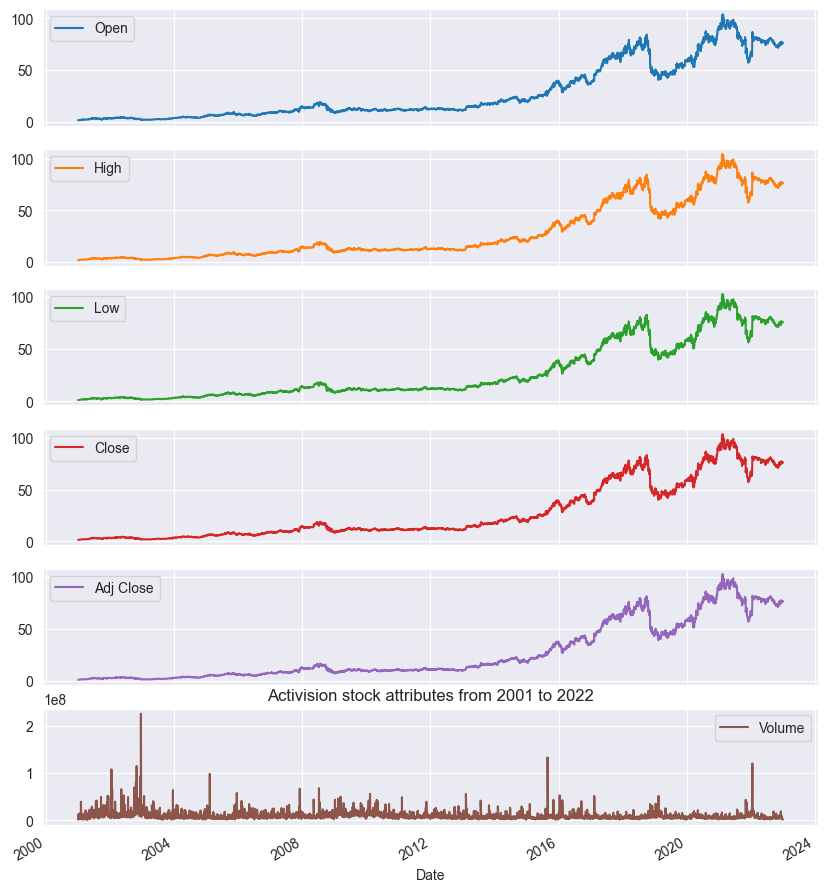

In [936]:
activision['2001':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Activision stock attributes from 2001 to 2022')
plt.show()

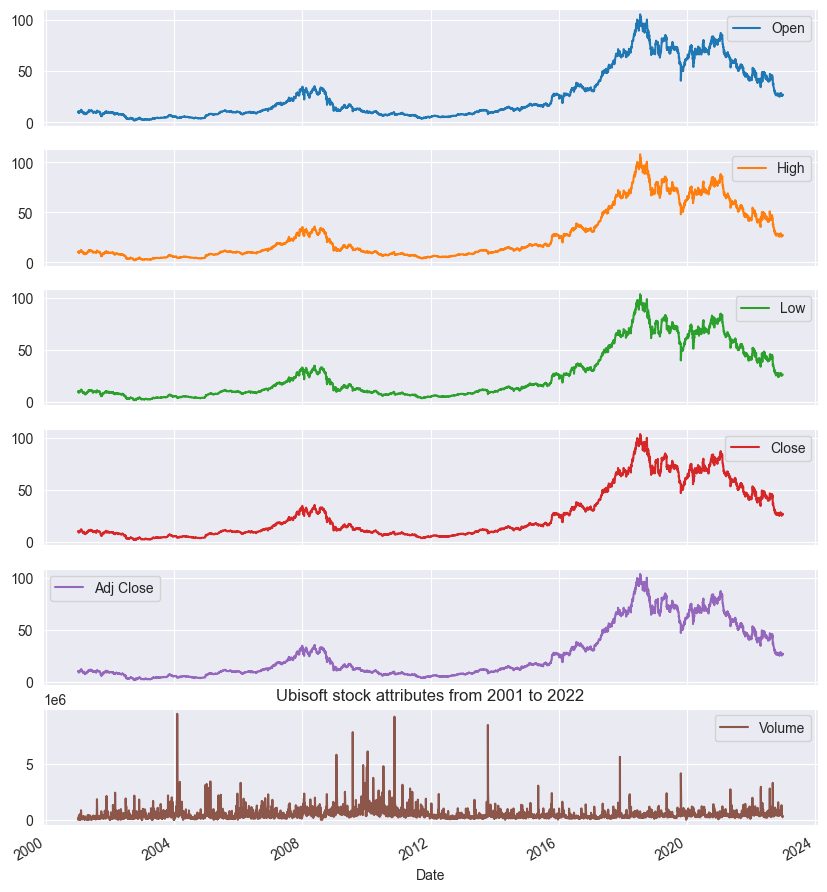

In [937]:
ubisoft['2001':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Ubisoft stock attributes from 2001 to 2022')
plt.show()

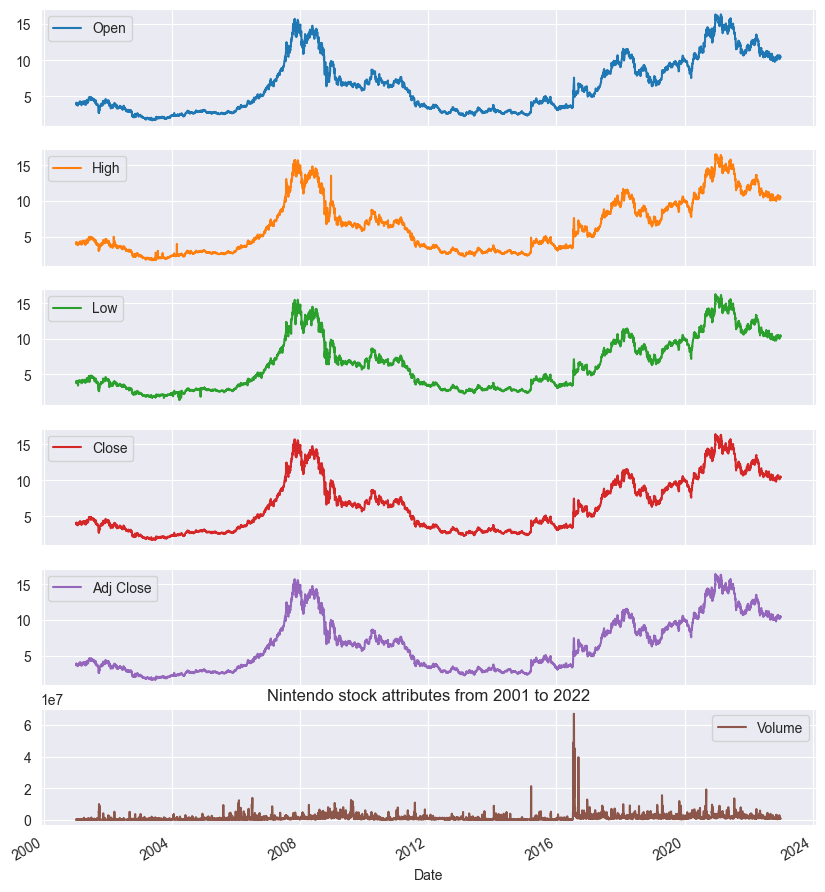

In [938]:
nintendo['2001':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Nintendo stock attributes from 2001 to 2022')
plt.show()

Plotting the high values


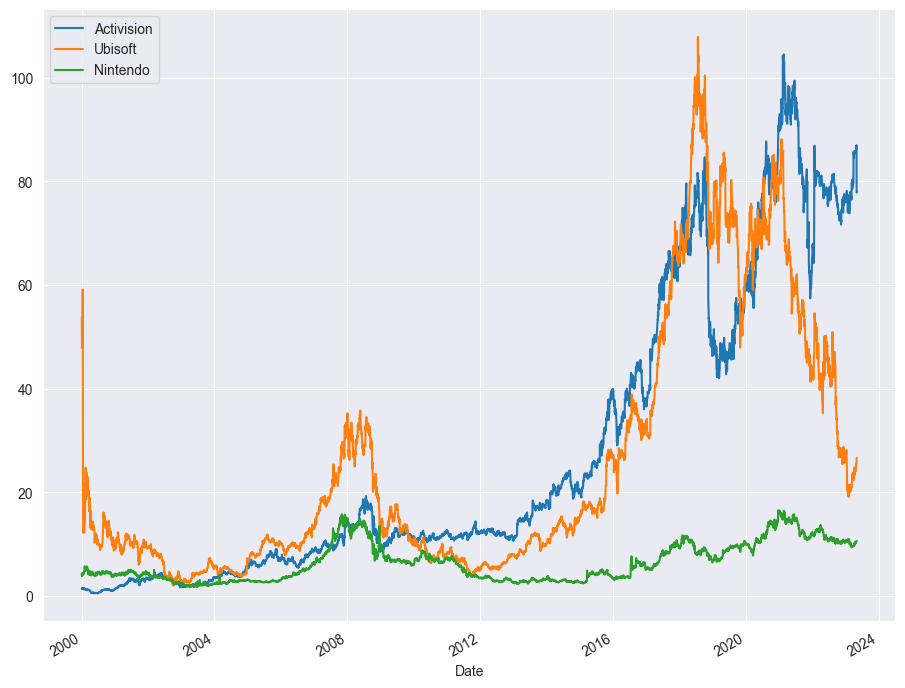

In [939]:
# Plotting before normalization
activision.High.plot()
ubisoft.High.plot()
nintendo.High.plot()
plt.legend(['Activision','Ubisoft','Nintendo'])
plt.show()

1. Activision: High value gradually increased after 2012 and dropped in between 2016 to 2020. After 2020 it is aroung 80.
2. Ubisoft: Similar to Activision except the continuous fall after 2020.
3. Nintendo: Value is stable in the range 5 to 20.

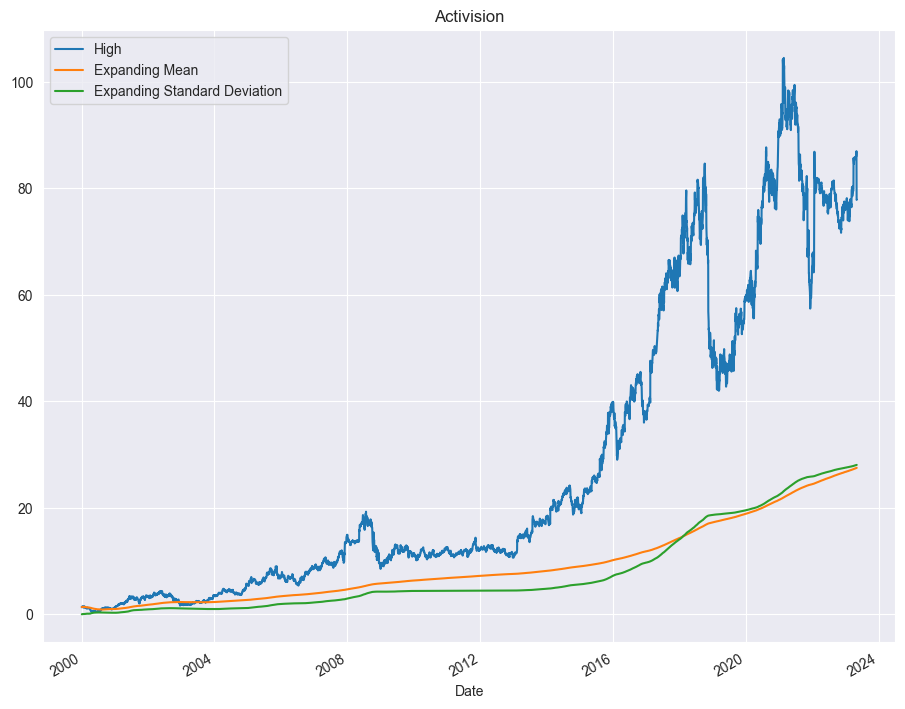

In [940]:
# Expanding window functions
activision_mean = activision.High.expanding().mean()
activision_std = activision.High.expanding().std()
activision.High.plot()
activision_mean.plot()
activision_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Activision')
plt.show()

The high value is above the mean throughout the given time frame.

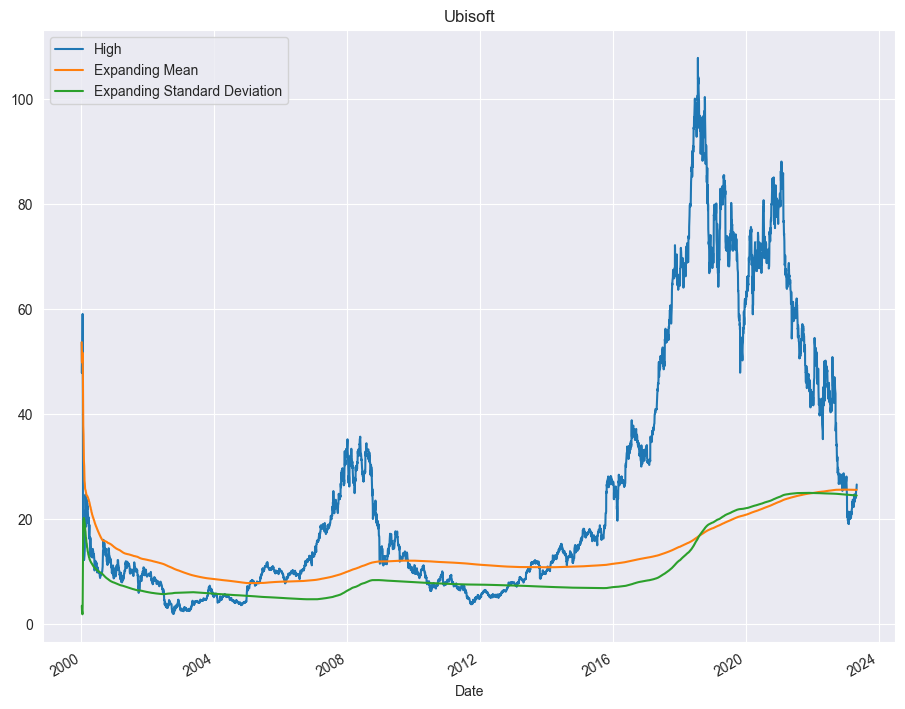

In [941]:
ubisoft_mean = ubisoft.High.expanding().mean()
ubisoft_std = ubisoft.High.expanding().std()
ubisoft.High.plot()
ubisoft_mean.plot()
ubisoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Ubisoft')
plt.show()

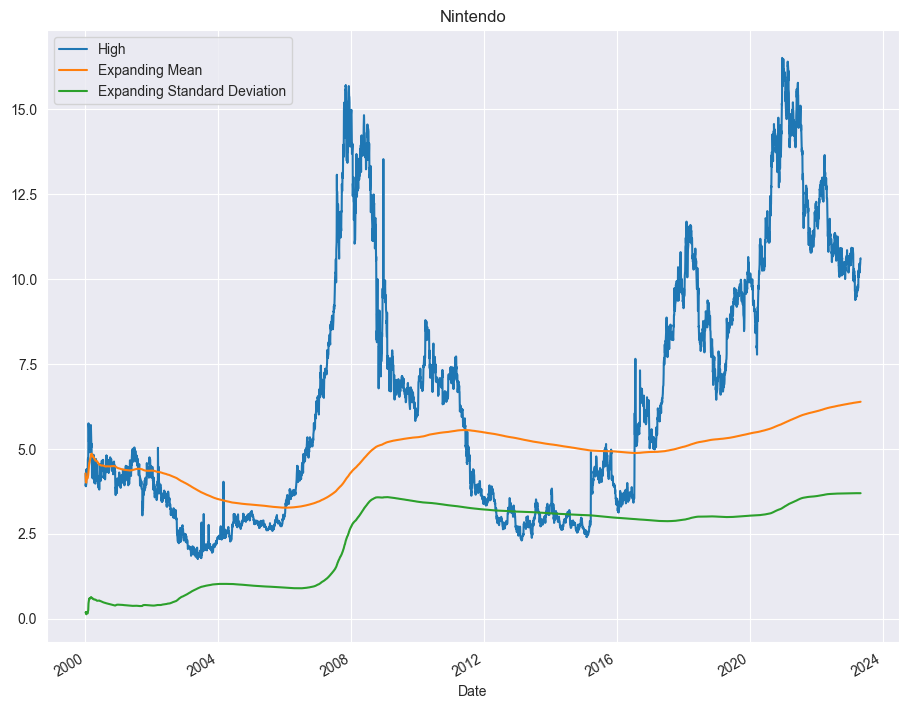

In [942]:
nintendo_mean = nintendo.High.expanding().mean()
nintendo_std = nintendo.High.expanding().std()
nintendo.High.plot()
nintendo_mean.plot()
nintendo_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Nintendo')
plt.show()

# Trend Analysis and seasonality

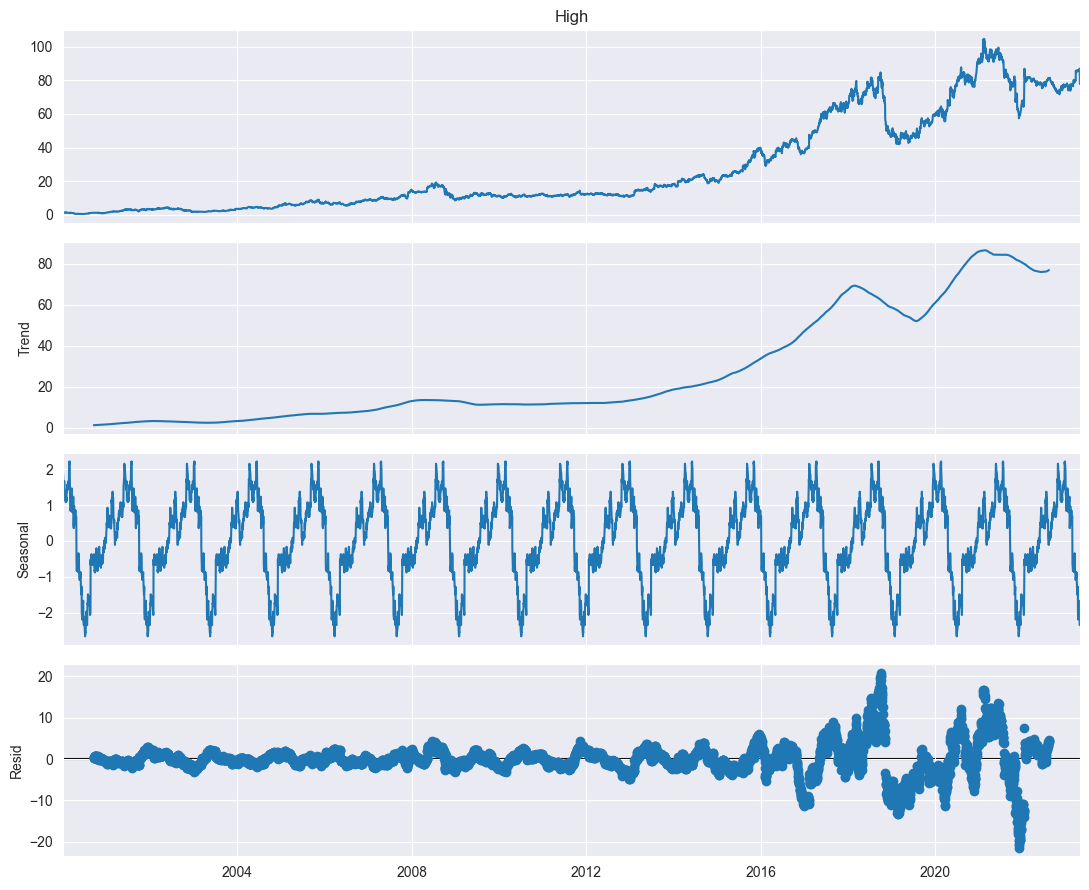

In [943]:
rcParams['figure.figsize'] = 11, 9
decomposed_activision_volume = sm.tsa.seasonal_decompose(activision["High"], period= len(range(1, 360)))
figure = decomposed_activision_volume.plot()
plt.show()
     


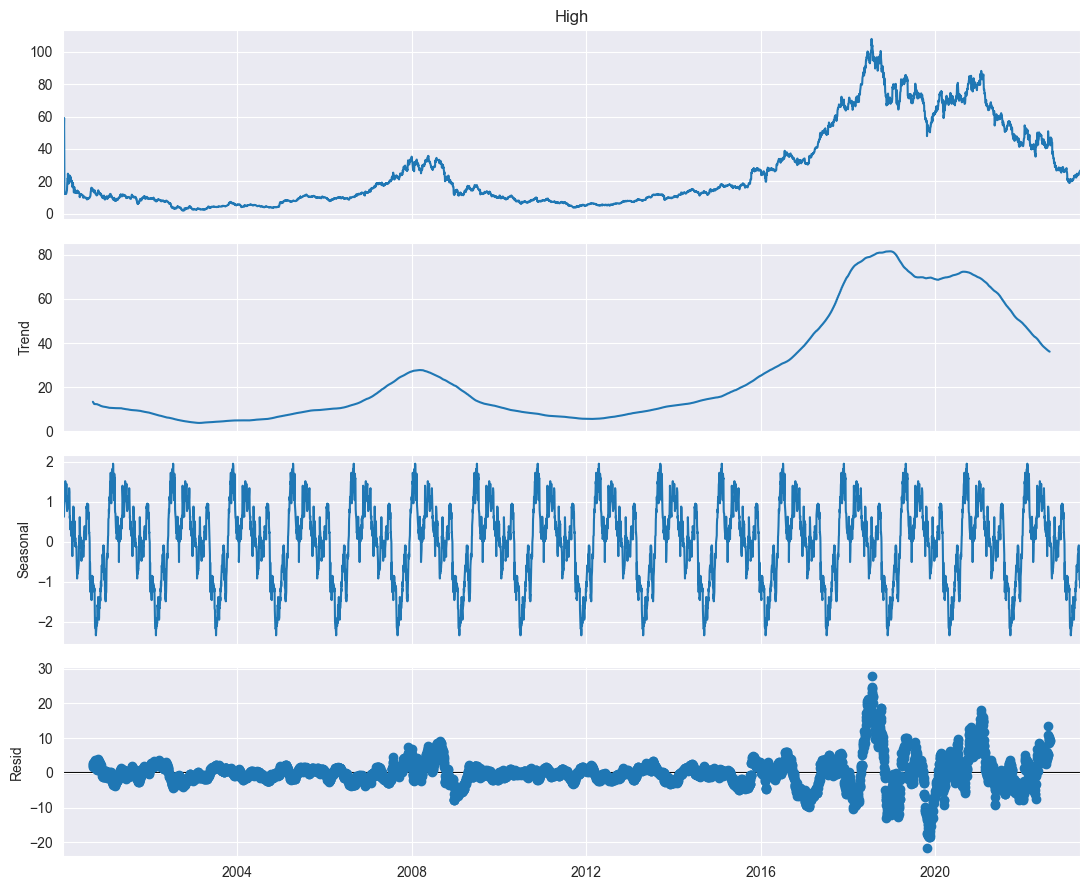

In [944]:
rcParams['figure.figsize'] = 11, 9
decomposed_ubisoft_volume = sm.tsa.seasonal_decompose(ubisoft["High"], period= len(range(1, 360)))
figure = decomposed_ubisoft_volume.plot()
plt.show()
     


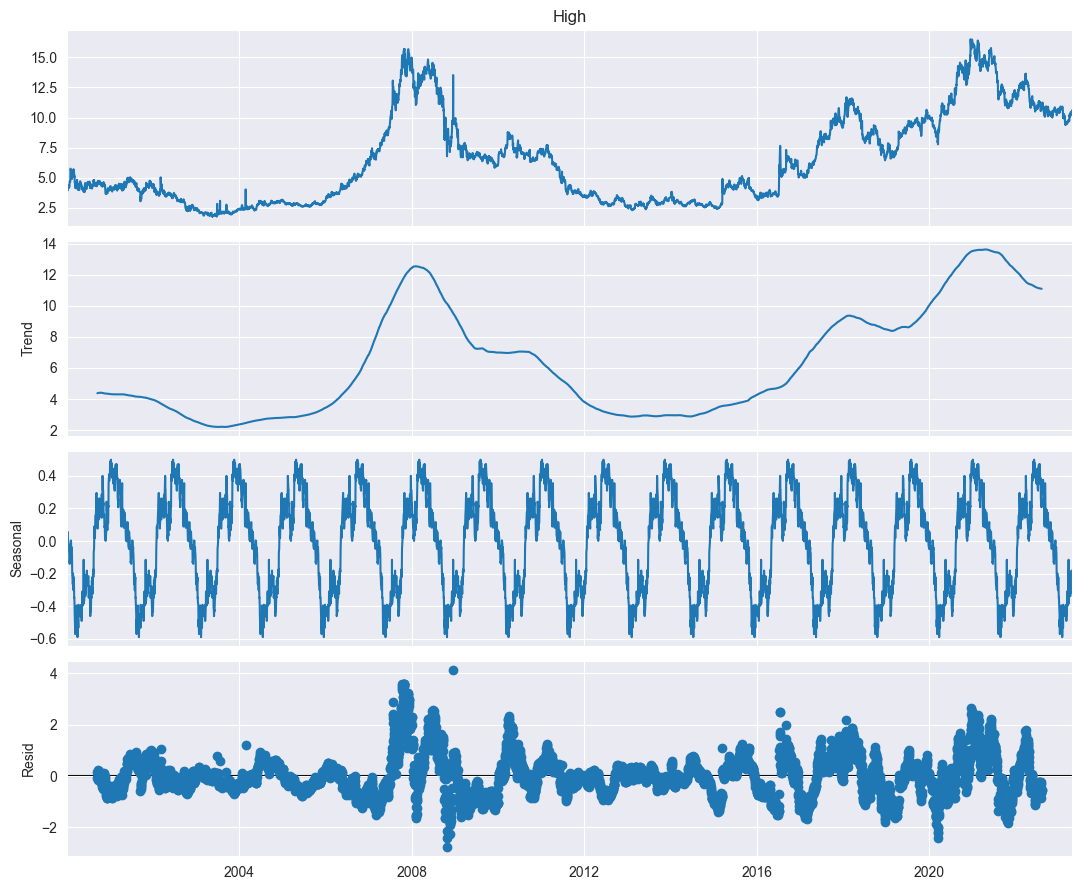

In [945]:
rcParams['figure.figsize'] = 11, 9
decomposed_nintendo_volume = sm.tsa.seasonal_decompose(nintendo["High"], period= len(range(1, 360)))
figure = decomposed_nintendo_volume.plot()
plt.show()
     


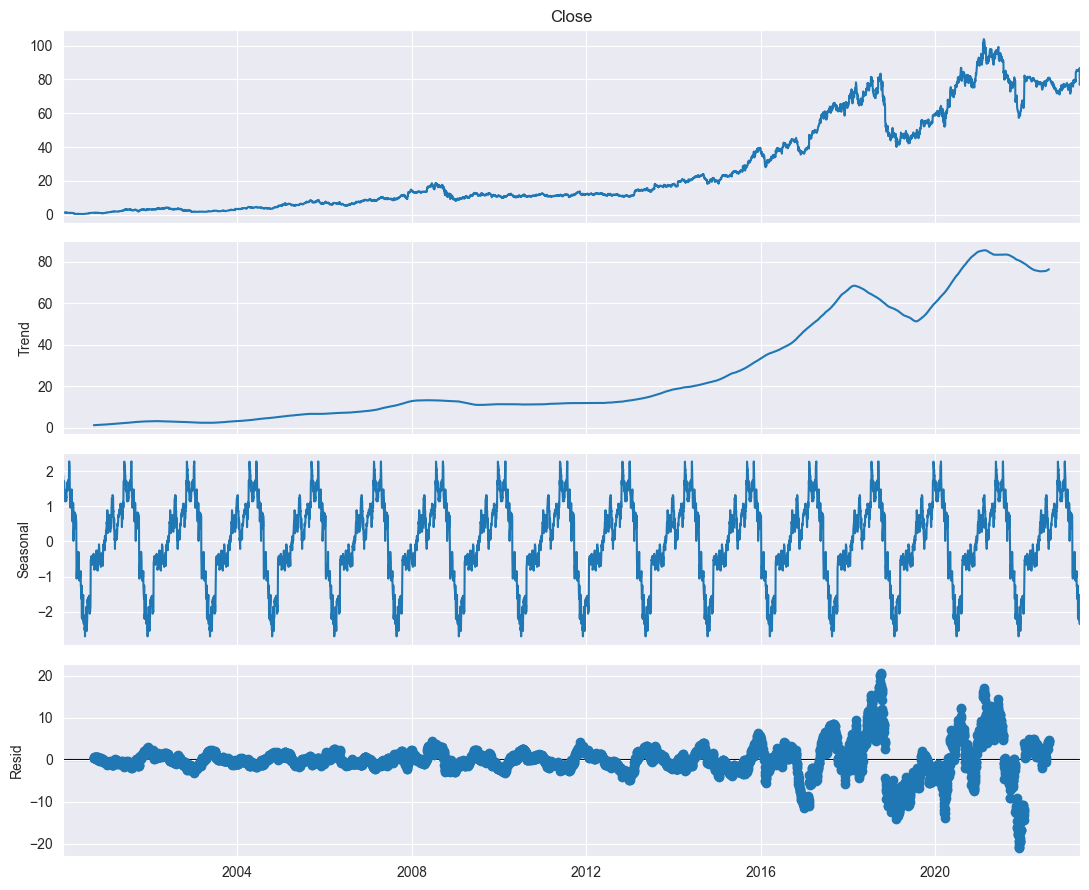

In [946]:
rcParams['figure.figsize'] = 11, 9
decomposed_activision_volume = sm.tsa.seasonal_decompose(activision["Close"], period= len(range(1, 360)))
figure = decomposed_activision_volume.plot()
plt.show()
     


# Prediction

In [947]:
filepath = 'Activision Blizzard.csv'
data_act = pd.read_csv(filepath)
data_act = data_act.sort_values('Date')
data_act.head()

Date      Open      High       Low     Close  Adj Close    Volume
0  2000-01-03  1.312500  1.375000  1.166667  1.369792   1.214421   7226400
1  2000-01-04  1.343750  1.354167  1.187500  1.328125   1.177480   4262400
2  2000-01-05  1.317708  1.364583  1.312500  1.333333   1.182098   3390000
3  2000-01-06  1.322917  1.333333  1.296875  1.307292   1.159010   2430000
4  2000-01-07  1.322917  1.354167  1.291667  1.343750   1.191333  15549600

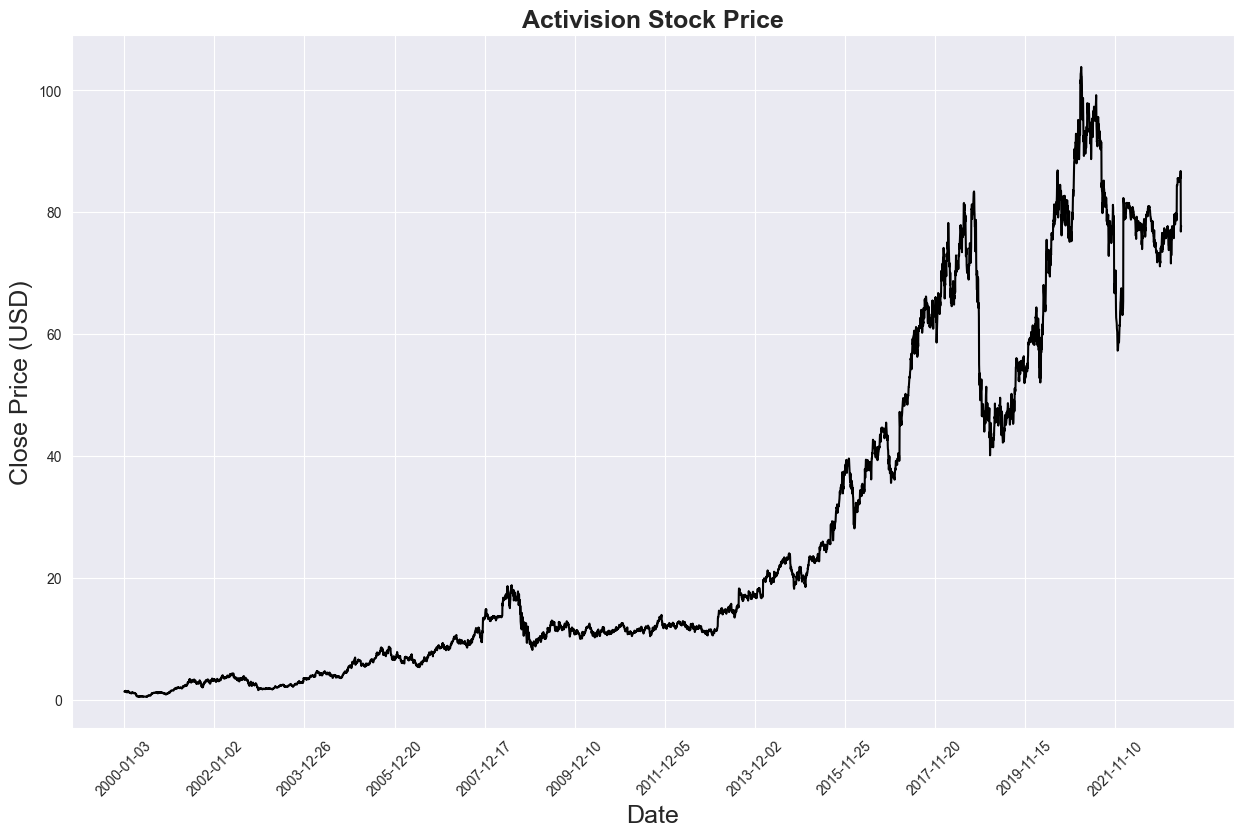

In [948]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_act[['Close']], color = 'black')
plt.xticks(range(0,data_act.shape[0],500),data_act['Date'].loc[::500],rotation=45)
plt.title("Activision Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [949]:
filepath = 'Ubisoft.csv'
data_ubi = pd.read_csv(filepath)
data_ubi = data_ubi.sort_values('Date')
data_ubi.head()

Date       Open       High        Low      Close  Adj Close   Volume
0  2000-01-04  53.750000  53.750000  48.000000  49.250000  49.250000  35332.0
1  2000-01-05  48.750000  48.750000  45.299999  46.825001  46.825001  22688.0
2  2000-01-06  46.325001  47.875000  46.325001  47.875000  47.875000  13656.0
3  2000-01-07  48.750000  49.200001  47.150002  47.150002  47.150002  18296.0
4  2000-01-10  50.000000  50.875000  48.000000  50.849998  50.849998  21072.0

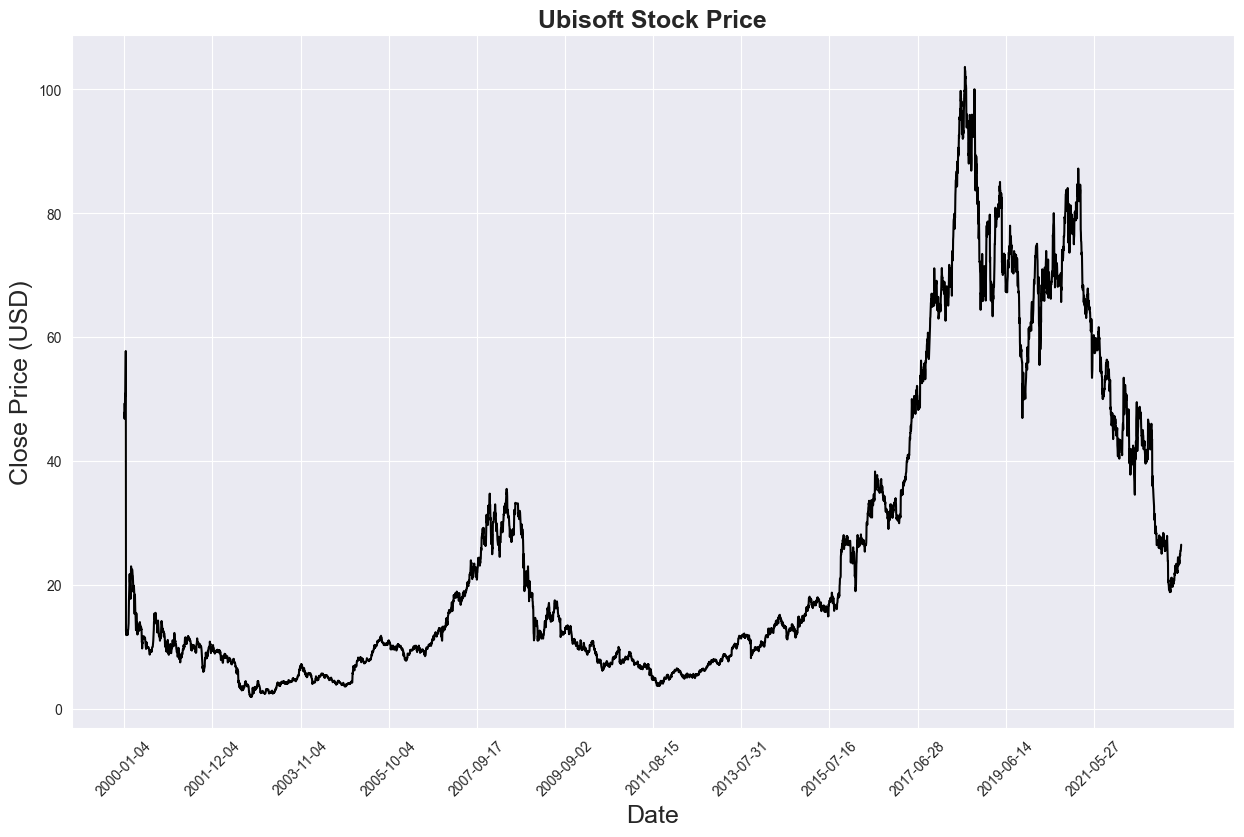

In [950]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ubi[['Close']], color = 'black')
plt.xticks(range(0,data_ubi.shape[0],500),data_ubi['Date'].loc[::500],rotation=45)
plt.title("Ubisoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [951]:
filepath = 'Nintendo.csv'
data_nin = pd.read_csv(filepath)
data_nin = data_nin.sort_values('Date')
data_nin.head()

Date   Open   High    Low  Close  Adj Close  Volume
0  2000-01-03  4.200  4.275  4.050  4.200   3.990652  134500
1  2000-01-04  3.950  4.025  3.800  3.950   3.753113  171000
2  2000-01-05  3.875  3.900  3.700  3.875   3.681852  301500
3  2000-01-06  3.800  3.975  3.725  3.800   3.610590  158500
4  2000-01-07  3.850  3.900  3.700  3.850   3.658098  156000

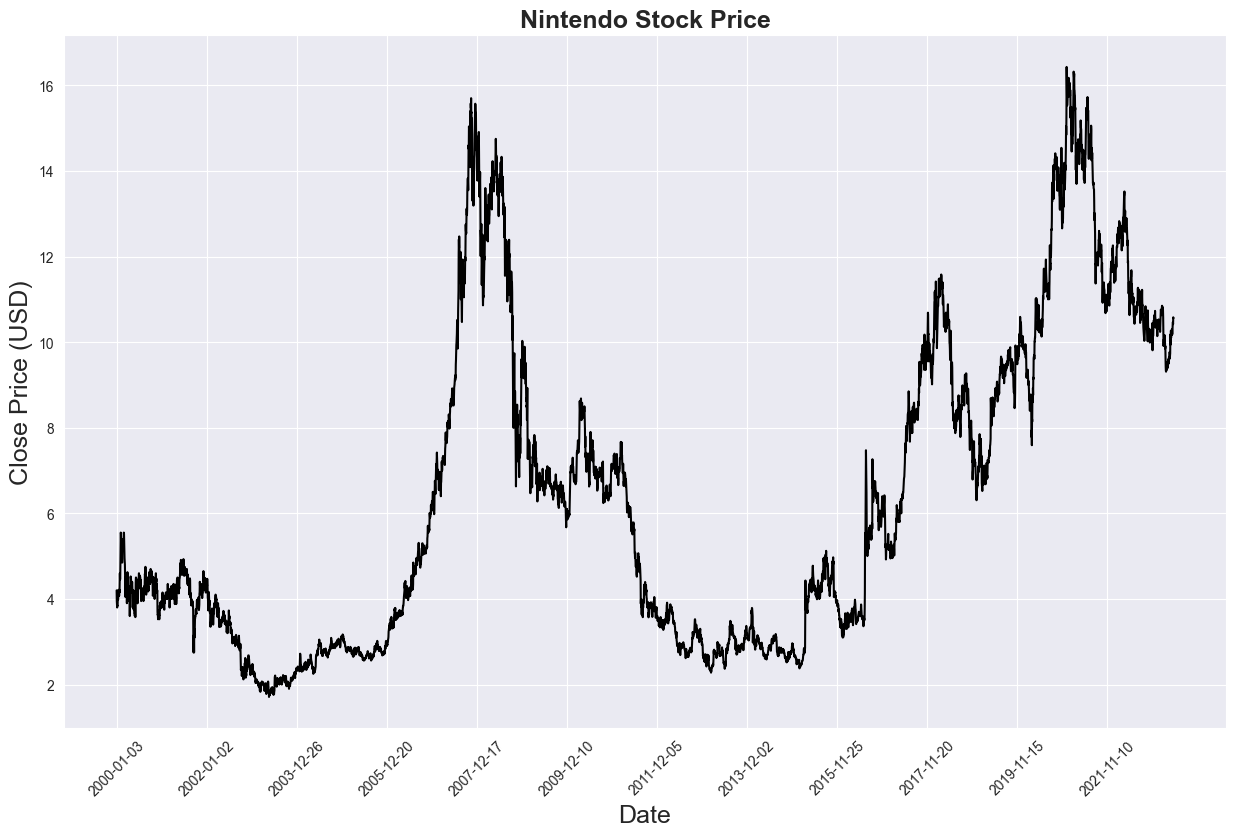

In [952]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_nin[['Close']], color = 'black')
plt.xticks(range(0,data_nin.shape[0],500),data_nin['Date'].loc[::500],rotation=45)
plt.title("Nintendo Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [953]:
price_act = data_act[['Close']]
price_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5868 entries, 0 to 5867
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5868 non-null   float64
dtypes: float64(1)
memory usage: 91.7 KB


In [954]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_act['Close'] = scaler.fit_transform(price_act['Close'].values.reshape(-1,1))
     

/var/folders/pf/6myn4gx94l76459nhfh0fp_w0000gn/T/ipykernel_2078/1816961525.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Defining a function to split the datasets into two parts: train set and test set

In [955]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]
     

In [956]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_act, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4678, 19, 1)
y_train.shape =  (4678, 1)
x_test.shape =  (1170, 19, 1)
y_test.shape =  (1170, 1)


In [957]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)



In [958]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [959]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

Calucating the loss function value.

In [960]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [961]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.27875739336013794
Epoch  1 MSE:  0.10056605190038681
Epoch  2 MSE:  0.17281745374202728
Epoch  3 MSE:  0.09564945846796036
Epoch  4 MSE:  0.06829547882080078
Epoch  5 MSE:  0.08032727986574173
Epoch  6 MSE:  0.08421853929758072
Epoch  7 MSE:  0.06675957143306732
Epoch  8 MSE:  0.037979282438755035
Epoch  9 MSE:  0.021682940423488617
Epoch  10 MSE:  0.035002514719963074
Epoch  11 MSE:  0.03066921979188919
Epoch  12 MSE:  0.006376826670020819
Epoch  13 MSE:  0.0036257444880902767
Epoch  14 MSE:  0.017950640991330147
Epoch  15 MSE:  0.020444603636860847
Epoch  16 MSE:  0.009130659513175488
Epoch  17 MSE:  0.003827342065051198
Epoch  18 MSE:  0.009520075283944607
Epoch  19 MSE:  0.00982139352709055
Epoch  20 MSE:  0.0035041566006839275
Epoch  21 MSE:  0.0012105269124731421
Epoch  22 MSE:  0.004305717069655657
Epoch  23 MSE:  0.007600374054163694
Epoch  24 MSE:  0.007625951897352934
Epoch  25 MSE:  0.004924200940877199
Epoch  26 MSE:  0.002452750690281391
Epoch  27 MSE:  0.

In [962]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))
print(predict[0])

0        1.596817
1        1.593590
2        1.606722
3        1.629198
4        1.652234
          ...    
4673    71.332352
4674    72.171600
4675    72.587540
4676    73.059296
4677    73.118477
Name: 0, Length: 4678, dtype: float32


Plotting the original cost alongwith the prediction cost in one plot and a plot for loss value vs epoch in another.

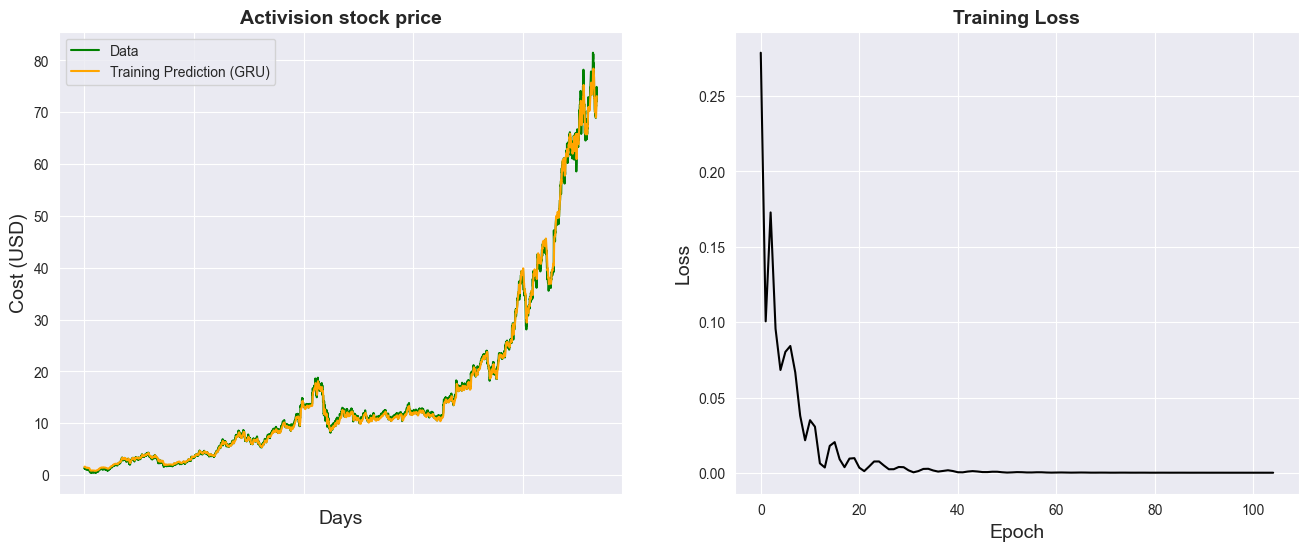

In [963]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='green')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='orange')
ax.set_title('Activision stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='black')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [964]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.64 RMSE
Test Score: 3.18 RMSE


In [965]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_act)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_act)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_act)-1, :] = y_test_pred

original = scaler.inverse_transform(price_act['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [966]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Activision Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [967]:
price_nin = data_nin[['Close']]
price_nin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5868 entries, 0 to 5867
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5868 non-null   float64
dtypes: float64(1)
memory usage: 91.7 KB


In [968]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_nin['Close'] = scaler.fit_transform(price_nin['Close'].values.reshape(-1,1))
     

/var/folders/pf/6myn4gx94l76459nhfh0fp_w0000gn/T/ipykernel_2078/313700700.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [969]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_nin, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)


x_train.shape =  (4678, 19, 1)
y_train.shape =  (4678, 1)
x_test.shape =  (1170, 19, 1)
y_test.shape =  (1170, 1)


In [970]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [971]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [972]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
     

In [973]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))


Epoch  0 MSE:  0.3500901460647583


Epoch  1 MSE:  0.16957242786884308
Epoch  2 MSE:  0.12146156281232834
Epoch  3 MSE:  0.1371464729309082
Epoch  4 MSE:  0.09365739673376083
Epoch  5 MSE:  0.06144804507493973
Epoch  6 MSE:  0.0587233230471611
Epoch  7 MSE:  0.042141564190387726
Epoch  8 MSE:  0.009469101205468178
Epoch  9 MSE:  0.010556709952652454
Epoch  10 MSE:  0.028346778824925423
Epoch  11 MSE:  0.01455256249755621
Epoch  12 MSE:  0.015232590027153492
Epoch  13 MSE:  0.018463635817170143
Epoch  14 MSE:  0.009981722570955753
Epoch  15 MSE:  0.0022135996259748936
Epoch  16 MSE:  0.0023554223589599133
Epoch  17 MSE:  0.006915619596838951
Epoch  18 MSE:  0.009442919865250587
Epoch  19 MSE:  0.008361493237316608
Epoch  20 MSE:  0.006469531450420618
Epoch  21 MSE:  0.005899905227124691
Epoch  22 MSE:  0.00610507233068347
Epoch  23 MSE:  0.005483281798660755
Epoch  24 MSE:  0.0035296559799462557
Epoch  25 MSE:  0.0014600750291720033
Epoch  26 MSE:  0.0009737408254295588
Epoch  27 MSE:  0.0021979045122861862
Epoch  28 MSE:

In [974]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))
print(predict[0])    

0       4.475169
1       4.437070
2       4.413983
3       4.644996
4       4.903994
          ...   
4673    8.588649
4674    8.796748
4675    8.821583
4676    8.890094
4677    9.016464
Name: 0, Length: 4678, dtype: float32


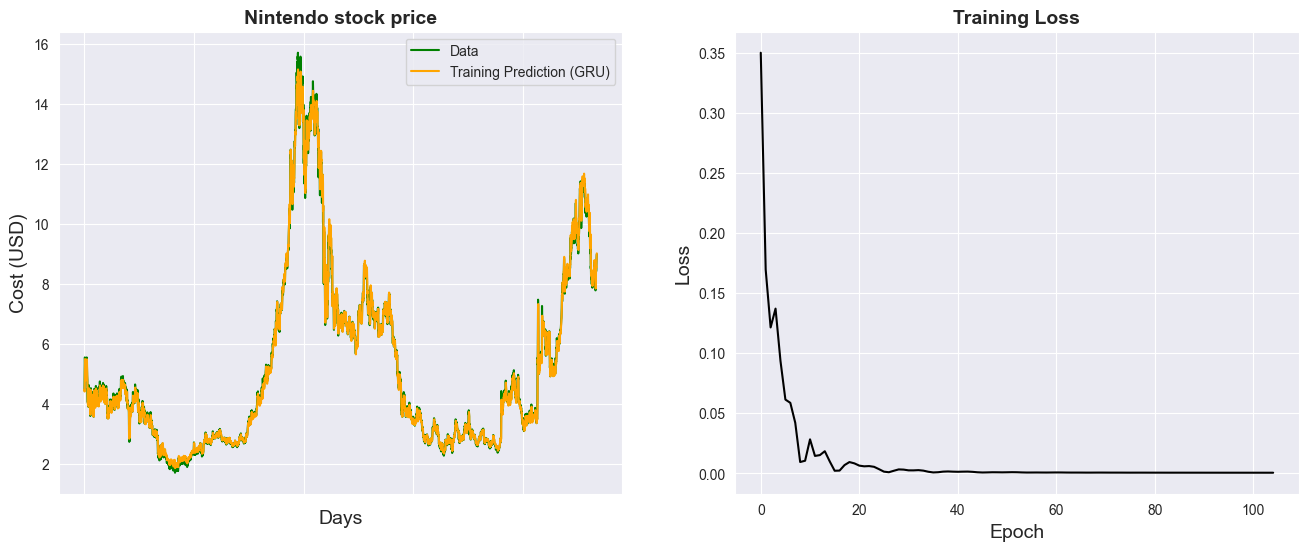

In [975]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='green')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='orange')
ax.set_title('Nintendo stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='black')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [976]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.18 RMSE
Test Score: 0.26 RMSE


In [977]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_nin)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_nin)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_nin)-1, :] = y_test_pred

original = scaler.inverse_transform(price_nin['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [980]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Nintendo Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()